# Fixed proxy experiments: 1600-1880

July 2020  
Katie Brennan  

In [1]:
import sys,os,copy

In [2]:
import sys
import numpy as np
import pickle

from scipy import stats
from scipy import signal

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

In [3]:
sys.path.insert(1,'/home/disk/p/mkb22/Documents/si_analysis_kb/instrumental_assimilation_experiments/')
import reanalysis_recons_utils as rrutils

sys.path.insert(1,'/home/disk/p/mkb22/Documents/si_utils_kb/')
import Sice_utils as siutils 

sys.path.insert(1,'/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/')
import commonera_utils as ce_utils 

Loading information from datasets.yml
Loading information from grid_def.yml
Loading information from datasets.yml
Loading information from grid_def.yml


In [4]:
import importlib
# #importlib.reload(LMRlite)
# #importlib.reload(LMR_config)
# importlib.reload(LMRlite)
importlib.reload(ce_utils)

<module 'commonera_utils' from '/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/commonera_utils.py'>

In [5]:
plt.rcParams['figure.dpi']=200

In [6]:
 def load_bren2020_full(): 
    data_dir = '/home/disk/p/mkb22/Documents/si_analysis_kb/instrumental_assimilation_experiments/Brennan_etal_2020/data/'
    filename = 'Brennan_etal_2020_sie_recons.nc'

    import xarray as xr

    data_bren2020 = xr.open_dataset(data_dir+filename)
    
    return data_bren2020

def load_bren2020_data(mod_list,temp_list):
    """INPUTS:
       mod_list = list of strings, all caps (ex: ['MPI','CCSM4'])
       temp_list = list of temperature datasets (ex: ['HadCRUT4','Berkeley_Earth','GISTEMP'])
    """
    data_bren2020 = load_bren2020_full()
    sie_bren2020 = {}
    sie_97_5_bren2020 = {}
    sie_2_5_bren2020 = {}
    
    for m in mod_list: 
        for d in temp_list: 
            sie_name = 'sie_'+m+'_'+d
            bren2020_time = data_bren2020[sie_name][d+'_time'].values
            sie_bren2020[sie_name] = np.nanmean(np.reshape(data_bren2020[sie_name].values,(169,1000)),axis=1)
            sie_97_5_bren2020[sie_name+'_97_5'] = data_bren2020[sie_name+'_97_5'].values
            sie_2_5_bren2020[sie_name+'_2_5'] = data_bren2020[sie_name+'_2_5'].values
            
    return bren2020_time, sie_bren2020, sie_97_5_bren2020, sie_2_5_bren2020

In [7]:
def sub_arctic_plot(fig,ax,VAR1,LAT,LON,TITLE1,MAX1,colorbar=True,extent=True):
    var1, lon1 = add_cyclic_point(VAR1, coord=LON)
    new_lon2d, new_lat2d = np.meshgrid(lon1, LAT)
    if extent is True: 
        ax.set_extent([-150, 140, 50, 90], crs=ccrs.PlateCarree())
    ax.gridlines(linestyle='--')
    ax.add_feature(cfeature.LAND, facecolor=(1, 1, 1))
    cs = ax.pcolormesh(new_lon2d, new_lat2d, var1, 
                       vmin=-MAX1, vmax=MAX1, cmap=plt.cm.RdBu_r, 
                       transform=ccrs.PlateCarree())
    ax.coastlines(resolution='110m', linewidth=0.5)
    if colorbar is True:
        plt.colorbar(cs, ax=ax)
    ax.set_title(TITLE1)

In [8]:
def load_recon_grid(): 
    lalo_dir = '/home/disk/p/mkb22/nobackup/LMR_output/common_era_experiments/experiments/'
    lalo_savename = '20CR_grid.pkl'

    grid = pickle.load(open(lalo_dir+lalo_savename,'rb'))
    
    return grid

In [9]:
proj = dict(projection=ccrs.Stereographic(central_latitude=90,
                                          central_longitude=-45,
                                          true_scale_latitude=0.1))

In [10]:
output_dir_ccsm4 = '/home/disk/p/mkb22/nobackup/LMR_output/common_era_experiments/experiments/ccsm4/'
output_file_ccsm4 = 'sic_ccsm4_anrecon_fixedprox_1600_1980_pages2kv2_inf2_6_loc15000_iter0.pkl'

niter_fp = 10

[sic_lalo_allit_ccsm4_fp, tas_lalo_allit_ccsm4_fp, sic_ens_var_allit_ccsm4_fp, 
 nobs_allit_ccsm4_fp, sia_ens_allit_ccsm4_fp, sie_ens_allit_ccsm4_fp, 
 Ye_assim_allit_ccsm4_fp,Ye_assim_coords_allit_ccsm4_fp, 
 Xb_inflate_allit_ccsm4_fp, recon_years_fp, 
 proxy_assim_loc_allit_ccsm4_fp] = ce_utils.load_recon_allit(output_dir_ccsm4,
                                                             output_file_ccsm4,niter_fp)

In [11]:
output_dir_ccsm4 = '/home/disk/p/mkb22/nobackup/LMR_output/common_era_experiments/experiments/ccsm4/'
output_file_ccsm4 = 'sic_ccsm4_anrecon_fixedprox_1200_1980_pages2kv2_inf2_6_loc15000_iter0.pkl'

niter_fp = 10

[sic_lalo_allit_ccsm4_fp_long, tas_lalo_allit_ccsm4_fp_long, 
 sic_ens_var_allit_ccsm4_fp_long, nobs_allit_ccsm4_fp_long, 
 sia_ens_allit_ccsm4_fp_long, sie_ens_allit_ccsm4_fp_long, 
 Ye_assim_allit_ccsm4_fp_long, Ye_assim_coords_allit_ccsm4_fp_long, 
 Xb_inflate_allit_ccsm4_fp_long, recon_years_fp_long, 
 proxy_assim_loc_allit_ccsm4_fp_long] = ce_utils.load_recon_allit(output_dir_ccsm4,
                                                                  output_file_ccsm4,
                                                                  niter_fp)

In [12]:
output_dir_ccsm4 = '/home/disk/p/mkb22/nobackup/LMR_output/common_era_experiments/experiments/ccsm4/'
output_file_ccsm4 = 'sic_ccsm4_anrecon_0_2000_pages2kv2_inf2_6_loc15000_iter0.pkl'

niter = 10

[sic_lalo_allit_ccsm4, tas_lalo_allit_ccsm4, sic_ens_var_allit_ccsm4, 
 nobs_allit_ccsm4, sia_ens_allit_ccsm4, sie_ens_allit_ccsm4, Ye_assim_allit_ccsm4, 
 Ye_assim_coords_allit_ccsm4, Xb_inflate_allit_ccsm4, recon_years, 
 proxy_assim_loc_allit_ccsm4] = ce_utils.load_recon_allit(output_dir_ccsm4,output_file_ccsm4,niter)

In [13]:
anom_start = 1850
anom_end = 1979

In [14]:
# LOAD BRENNAN ET AL 2020 DATA: 
[bren2020_time, sie_bren2020, 
 sie_97_5_bren2020, sie_2_5_bren2020] = load_bren2020_data(['CCSM4','MPI'],['HadCRUT4'])

# adjust anomalies: 
time_inds = np.where((bren2020_time<anom_end)&(bren2020_time>anom_start-1))

sie_bren2020['sie_MPI_HadCRUT4_anom'] = (sie_bren2020['sie_MPI_HadCRUT4']-
                                         np.nanmean(sie_bren2020['sie_MPI_HadCRUT4'][time_inds]))
sie_bren2020['sie_CCSM4_HadCRUT4_anom'] = (sie_bren2020['sie_CCSM4_HadCRUT4']-
                                           np.nanmean(sie_bren2020['sie_CCSM4_HadCRUT4'][time_inds]))
sie_MPI_HadCRUT4_97_5_anom = (sie_97_5_bren2020['sie_MPI_HadCRUT4_97_5']-
                              np.nanmean(sie_bren2020['sie_MPI_HadCRUT4'][time_inds]))
sie_CCSM4_HadCRUT4_97_5_anom =  (sie_97_5_bren2020['sie_CCSM4_HadCRUT4_97_5']-
                                 np.nanmean(sie_bren2020['sie_MPI_HadCRUT4'][time_inds]))
sie_MPI_HadCRUT4_2_5_anom = (sie_2_5_bren2020['sie_MPI_HadCRUT4_2_5']-
                             np.nanmean(sie_bren2020['sie_MPI_HadCRUT4'][time_inds]))
sie_CCSM4_HadCRUT4_2_5_anom =  (sie_2_5_bren2020['sie_CCSM4_HadCRUT4_2_5']-
                                np.nanmean(sie_bren2020['sie_CCSM4_HadCRUT4'][time_inds]))

In [15]:
# LOAD ANNUAL SATELLITE DATA: 
[fet_sia_anom, fet_sie_anom, fet_time] = rrutils.load_annual_satellite_anom(anom_end)
[fet_sia, fet_sie, fet_time2] = rrutils.load_annual_satellite()

In [16]:
# LOAD ANNUAL WALSH DATA: 
[walsh_sia, walsh_sie, walsh_time] = rrutils.load_annual_walsh()

walsh_sia_anom = rrutils.find_anomalies(walsh_time, walsh_sia, anom_start,anom_end)
walsh_sie_anom = rrutils.find_anomalies(walsh_time, walsh_sie, anom_start,anom_end)

In [55]:
# Find indices to take anomalies over: 
anom_ind = np.where((np.array(recon_years)<anom_end)&(np.array(recon_years)>=anom_start))
anom_ind_fp = np.where((np.array(recon_years_fp)<anom_end)&(np.array(recon_years_fp)>=anom_start))
anom_ind_fp_long = np.where((np.array(recon_years_fp_long)<anom_end)&(np.array(recon_years_fp_long)>=anom_start))

In [56]:
sie_ens_allit_2d_ccsm4 = np.reshape(sie_ens_allit_ccsm4,(sie_ens_allit_ccsm4.shape[0],
                                    sie_ens_allit_ccsm4.shape[1]*sie_ens_allit_ccsm4.shape[2]))
sie_ens_anom_allit_ccsm4 = sie_ens_allit_2d_ccsm4 - np.nanmean(np.squeeze(sie_ens_allit_2d_ccsm4[anom_ind,:]),axis=0)
sie_ensmn_anom_allit_ccsm4 = np.nanmean(sie_ens_anom_allit_ccsm4,axis=1)

sie_97_5_allit_ccsm4 = np.percentile(sie_ens_anom_allit_ccsm4,97.5,axis=1)
sie_2_5_allit_ccsm4 = np.percentile(sie_ens_anom_allit_ccsm4,2.5,axis=1)


sie_ens_allit_2d_ccsm4_fp = np.reshape(sie_ens_allit_ccsm4_fp,(sie_ens_allit_ccsm4_fp.shape[0],
                                    sie_ens_allit_ccsm4_fp.shape[1]*sie_ens_allit_ccsm4_fp.shape[2]))
sie_ens_anom_allit_ccsm4_fp = sie_ens_allit_2d_ccsm4_fp - np.nanmean(np.squeeze(sie_ens_allit_2d_ccsm4_fp[anom_ind_fp,:]),axis=0)
sie_ensmn_anom_allit_ccsm4_fp = np.nanmean(sie_ens_anom_allit_ccsm4_fp,axis=1)

sie_97_5_allit_ccsm4_fp = np.percentile(sie_ens_anom_allit_ccsm4_fp,97.5,axis=1)
sie_2_5_allit_ccsm4_fp = np.percentile(sie_ens_anom_allit_ccsm4_fp,2.5,axis=1)


sie_ens_allit_2d_ccsm4_fp_long = np.reshape(sie_ens_allit_ccsm4_fp_long,
                                            (sie_ens_allit_ccsm4_fp_long.shape[0],
                                             sie_ens_allit_ccsm4_fp_long.shape[1]*sie_ens_allit_ccsm4_fp_long.shape[2]))
sie_ens_anom_allit_ccsm4_fp_long = sie_ens_allit_2d_ccsm4_fp_long - np.nanmean(np.squeeze(sie_ens_allit_2d_ccsm4_fp_long[anom_ind_fp_long,:]),axis=0)
sie_ensmn_anom_allit_ccsm4_fp_long = np.nanmean(sie_ens_anom_allit_ccsm4_fp_long,axis=1)

sie_97_5_allit_ccsm4_fp_long = np.percentile(sie_ens_anom_allit_ccsm4_fp_long,97.5,axis=1)
sie_2_5_allit_ccsm4_fp_long = np.percentile(sie_ens_anom_allit_ccsm4_fp_long,2.5,axis=1)

In [57]:
[ce_sie_ccsm4,corr_sie_ccsm4,
 var_sie_sat_ccsm4,
 var_sie_recon_ccsm4] = rrutils.find_ce_corr(sie_ensmn_anom_allit_ccsm4_fp, 
                                             sie_bren2020['sie_CCSM4_HadCRUT4_anom'],
                                             bren2020_time,
                                             np.array(recon_years_fp),1850,anom_end)

[ce_sie_ccsm4_fp_full,
 corr_sie_ccsm4_fp_full,
 var_sie_sat_ccsm4_fp_full,
 var_sie_recon_ccsm4_fp_full] = rrutils.find_ce_corr(sie_ensmn_anom_allit_ccsm4, 
                                                     sie_ensmn_anom_allit_ccsm4_fp,
                                                     np.array(recon_years_fp),
                                                     np.array(recon_years),1600,anom_end)

In [58]:
[ce_sie_long,corr_sie_long,
 var_sie_sat_long,var_sie_recon_long] = rrutils.find_ce_corr(sie_ensmn_anom_allit_ccsm4_fp_long, 
                                                             sie_bren2020['sie_CCSM4_HadCRUT4_anom'],
                                                             bren2020_time,
                                                             np.array(recon_years_fp_long),1850,anom_end)


[ce_sie_ccsm4_fp_long,
 corr_sie_ccsm4_fp_long,
 var_sie_sat_ccsm4_fp_long,
 var_sie_recon_ccsm4_fp_long] = rrutils.find_ce_corr(sie_ensmn_anom_allit_ccsm4, 
                                                     sie_ensmn_anom_allit_ccsm4_fp_long,
                                                     np.array(recon_years_fp_long),
                                                     np.array(recon_years),1200,anom_end)

In [59]:
sie_ccsm4_var_fp = np.var(sie_ensmn_anom_allit_ccsm4_fp)

anom_ind_var = np.where((np.array(recon_years)<recon_years_fp[-1]+1)&(np.array(recon_years)>=recon_years_fp[0]))
sie_ccsm4_var = np.var(sie_ensmn_anom_allit_ccsm4[anom_ind_var])

In [60]:
[ce_sie_ccsm4_it,
 corr_sie_ccsm4_it,
 var_sie_sat_ccsm4_it,
 var_sie_recon_ccsm4_it] = rrutils.find_ce_corr(np.nanmean(sie_ens_allit_ccsm4_fp,axis=1)[:,0], 
                                                np.nanmean(sie_ens_allit_ccsm4_fp,axis=1)[:,1],
                                                np.array(recon_years_fp),
                                                np.array(recon_years_fp),1600,1980)

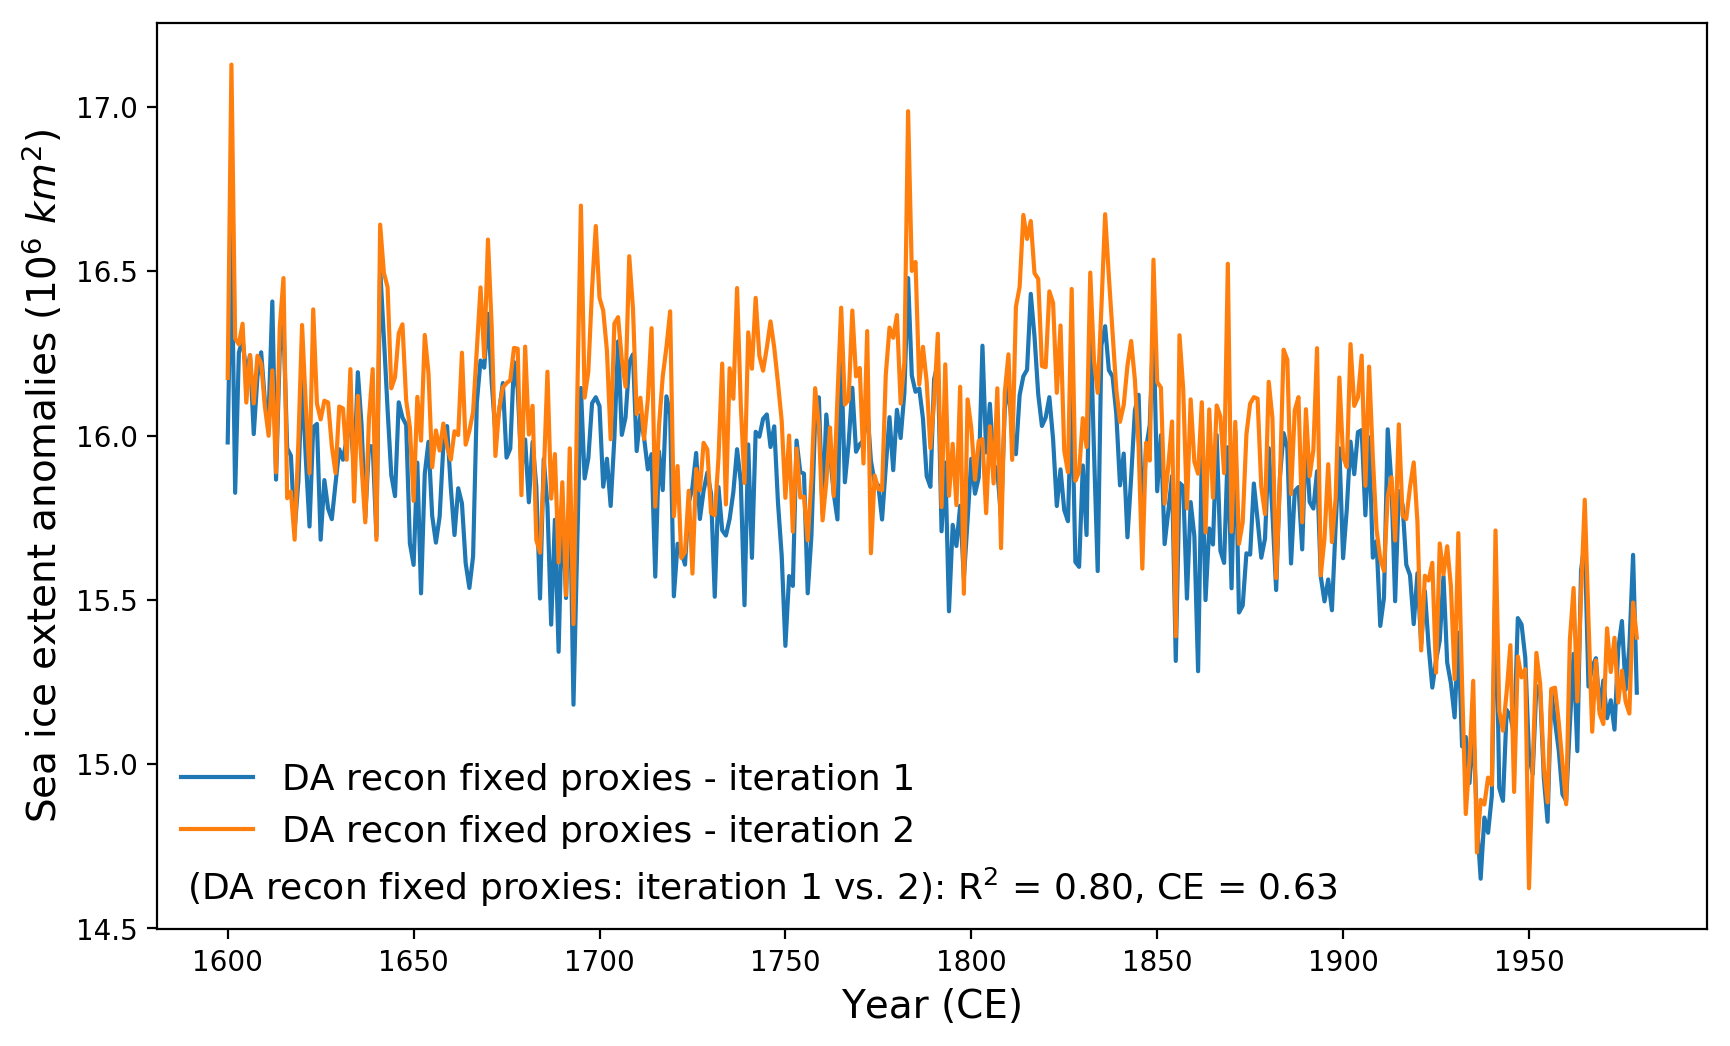

In [61]:
plt.figure(figsize=(10,6))
plt.plot(recon_years_fp,np.nanmean(sie_ens_allit_ccsm4_fp,axis=1)[:,0],
         label='DA recon fixed proxies - iteration 1')
plt.plot(recon_years_fp,np.nanmean(sie_ens_allit_ccsm4_fp,axis=1)[:,1],
         label='DA recon fixed proxies - iteration 2')
#plt.plot(recon_years_fp,np.nanmean(np.nanmean(sie_ens_allit_ccsm4_fp,axis=1),axis=1),color='k')

plt.ylabel('Sea ice extent anomalies (10$^{6}$ $km^2$)',fontsize=14)
plt.xlabel('Year (CE)',fontsize=14)

ce_corr_plt_ccsm4 = (('(DA recon fixed proxies: iteration 1 vs. 2): R$^{2}$ = ' + '{:,.2f}'.format(corr_sie_ccsm4_it**2))+
               ', CE = '+'{:,.2f}'.format(ce_sie_ccsm4_it))

plt.gcf().text(0.14, 0.15, ce_corr_plt_ccsm4 , fontsize=13,color='k')
plt.legend(fontsize=13,bbox_to_anchor=(0.51, 0.22),frameon=False)

(1850, 2000)

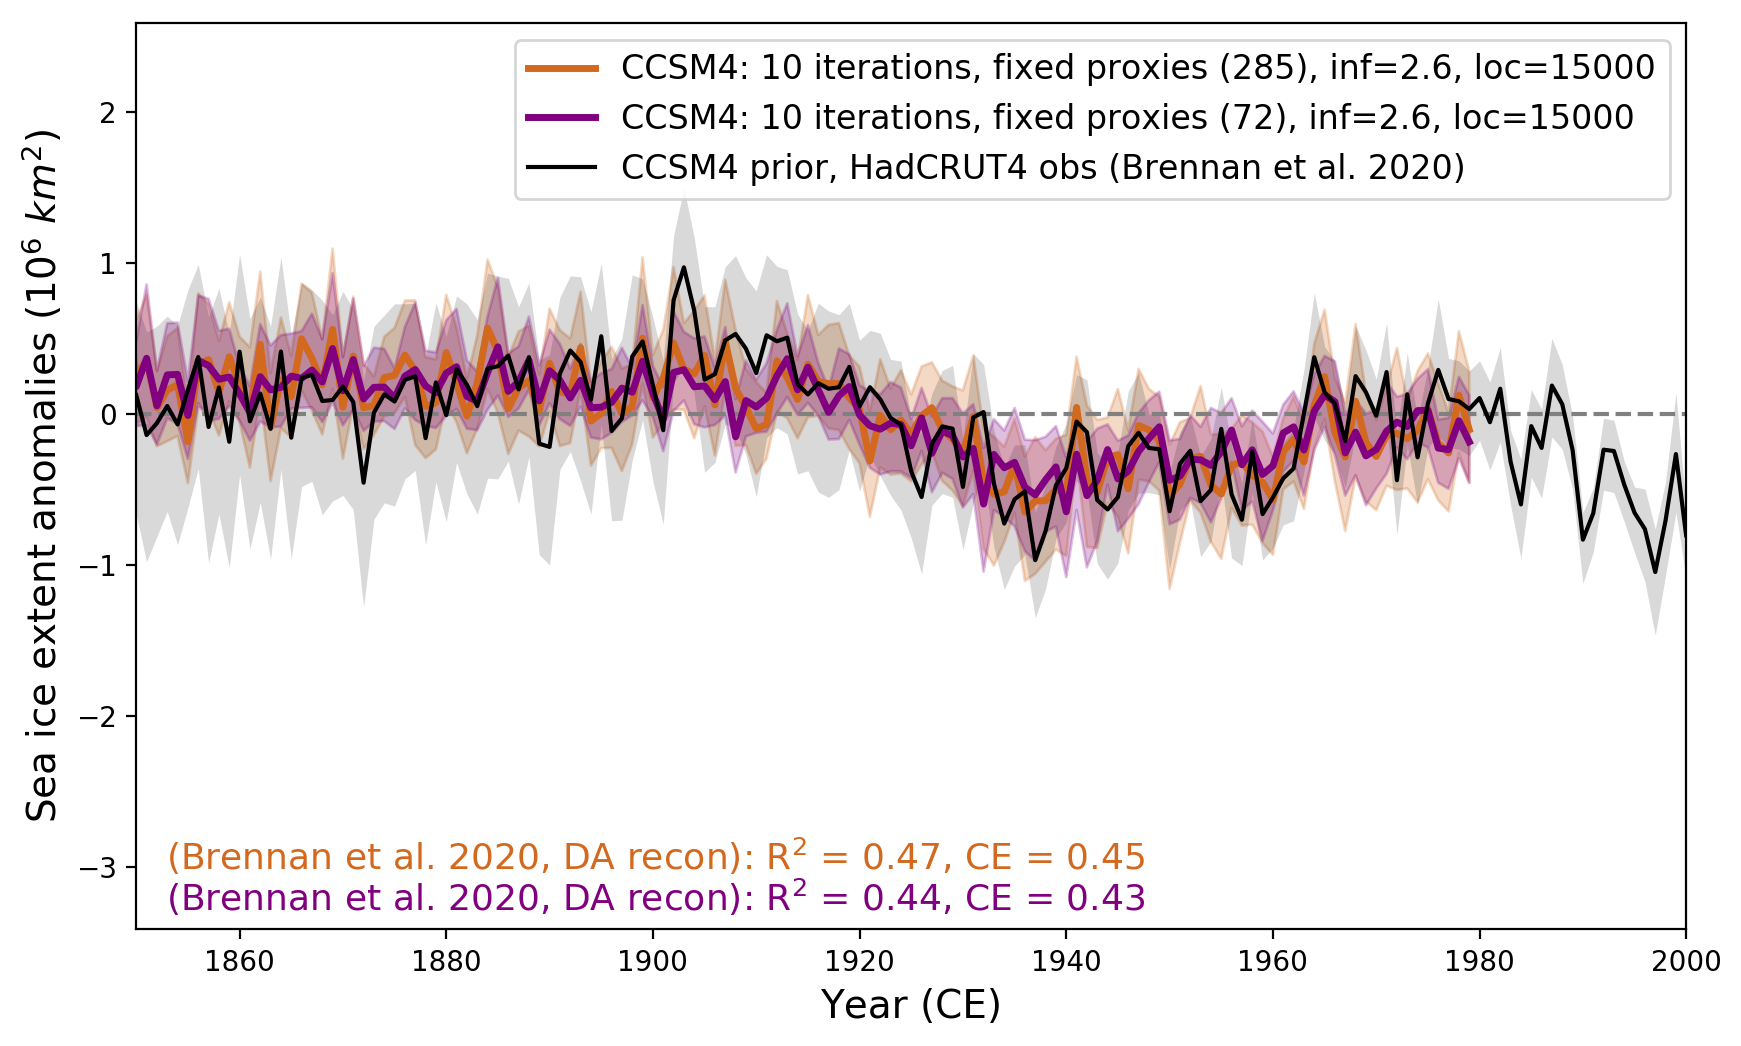

In [65]:
plt.figure(figsize=(10,6))
plt.axhline(0,linestyle='--',color='grey')

plt.fill_between(recon_years_fp,sie_2_5_allit_ccsm4_fp,
                 sie_97_5_allit_ccsm4_fp,alpha=0.25,color='chocolate')
plt.fill_between(bren2020_time,sie_CCSM4_HadCRUT4_2_5_anom,
                 sie_CCSM4_HadCRUT4_97_5_anom,color='k',alpha=0.15, linewidth=0.01)
plt.fill_between(recon_years_fp_long,sie_2_5_allit_ccsm4_fp_long,
                 sie_97_5_allit_ccsm4_fp_long,alpha=0.25,color='purple')


plt.plot(recon_years_fp,sie_ensmn_anom_allit_ccsm4_fp,color='chocolate',#'#107ab0',
         label=('CCSM4: '+str(niter_fp)+' iterations, fixed proxies (285), inf=2.6, loc=15000'),
         linewidth=2.5)
plt.plot(recon_years_fp_long,sie_ensmn_anom_allit_ccsm4_fp_long,
         color='purple',#'#107ab0',
         label='CCSM4: '+str(niter_fp)+' iterations, fixed proxies (72), inf=2.6, loc=15000',
         linewidth=2.5)
plt.plot(bren2020_time,sie_bren2020['sie_CCSM4_HadCRUT4_anom'],
         label='CCSM4 prior, HadCRUT4 obs (Brennan et al. 2020)', color='k',linewidth=1.5)

plt.ylabel('Sea ice extent anomalies (10$^{6}$ $km^2$)',fontsize=14)
plt.xlabel('Year (CE)',fontsize=14)
#plt.title('Total Arctic Sea Ice Extent', fontsize=14)

plt.legend(fontsize=12,bbox_to_anchor=(1, 1))
#plt.ylim(7,13.1,1)
ce_corr_plt_ccsm4 = (('(Brennan et al. 2020, DA recon): R$^{2}$ = ' + '{:,.2f}'.format(corr_sie_ccsm4**2))+
               ', CE = '+'{:,.2f}'.format(ce_sie_ccsm4))
ce_corr_plt_long = (('(Brennan et al. 2020, DA recon): R$^{2}$ = ' + '{:,.2f}'.format(corr_sie_long**2))+
               ', CE = '+'{:,.2f}'.format(ce_sie_long))

plt.gcf().text(0.14, 0.175, ce_corr_plt_ccsm4 , fontsize=13,color='chocolate')
plt.gcf().text(0.14, 0.14, ce_corr_plt_long , fontsize=13,color='purple')

plt.xlim(1850,2000)
#plt.xlim(0,100)

#print(ce_sie,corr_sie,var_sie_sat,var_sie_recon)

# savedir = ('/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/'+
#            'analysis/figures/sic_ccsm4_anrecon_1979_2000_fullLMRdbv1_1_inf1_loc25000_10iterations/')
# savename = 'tot_sie_v_sat_10it_1979_2017.png'
# plt.savefig(savedir+savename)

(-1.5, 2.2)

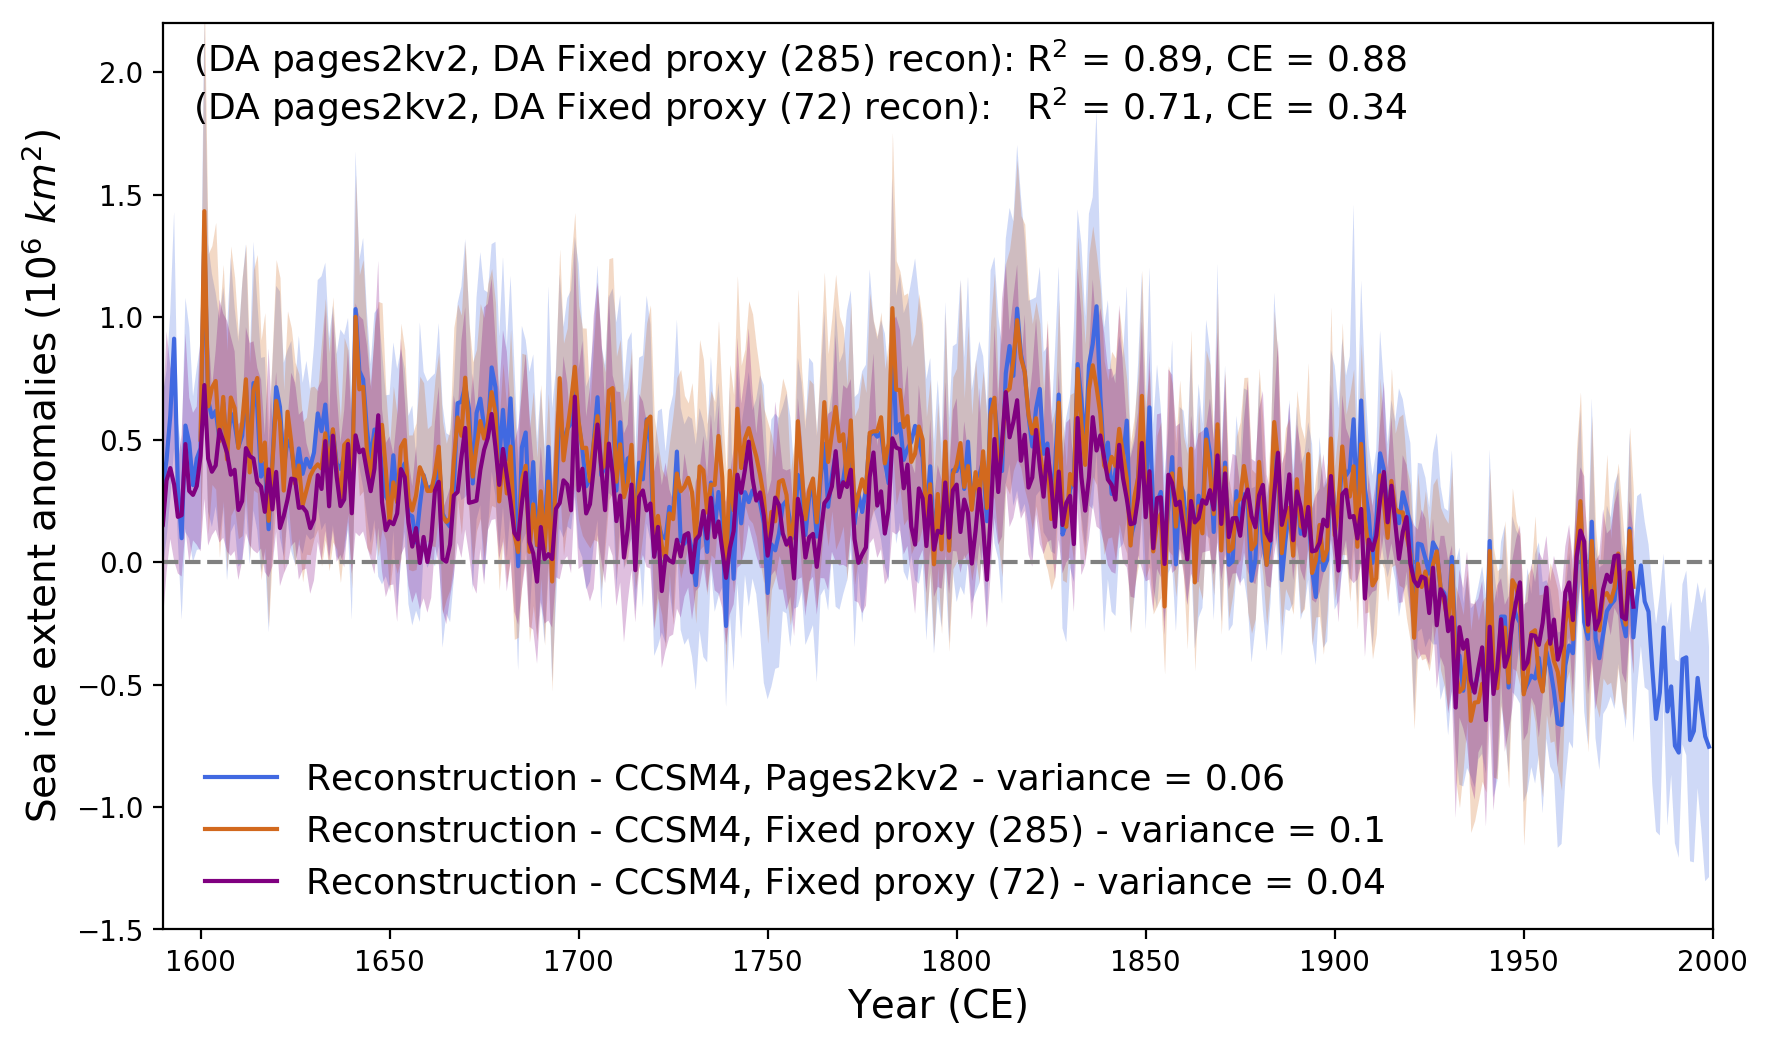

In [63]:
plt.figure(figsize=(10,6))
plt.axhline(0,linestyle='--',color='grey')

# plt.fill_between(recon_years,sie_2_5_allit_mpi,sie_97_5_allit_mpi,alpha=0.15, color='purple')
plt.fill_between(recon_years,sie_2_5_allit_ccsm4,sie_97_5_allit_ccsm4,
                 alpha=0.25, color='royalblue',linewidth=0.01)
plt.fill_between(recon_years_fp,sie_2_5_allit_ccsm4_fp,sie_97_5_allit_ccsm4_fp,
                 alpha=0.25, color='chocolate',linewidth=0.01)
plt.fill_between(recon_years_fp_long,sie_2_5_allit_ccsm4_fp_long,
                 sie_97_5_allit_ccsm4_fp_long, alpha=0.25, 
                 color='purple',linewidth=0.01)

plt.plot(recon_years,sie_ensmn_anom_allit_ccsm4,
         color='royalblue',
         label=('Reconstruction - CCSM4, Pages2kv2 - variance = '+
                str(np.round(np.var(sie_ensmn_anom_allit_ccsm4),2))),linewidth=1.5)
plt.plot(recon_years_fp,sie_ensmn_anom_allit_ccsm4_fp,
         color='chocolate',linewidth=1.5,
         label=('Reconstruction - CCSM4, Fixed proxy (285) - variance = '+
                str(np.round(np.var(sie_ensmn_anom_allit_ccsm4_fp),2))))
plt.plot(recon_years_fp_long,sie_ensmn_anom_allit_ccsm4_fp_long,
         color='purple',linewidth=1.5,
         label=('Reconstruction - CCSM4, Fixed proxy (72) - variance = '+
                str(np.round(np.var(sie_ensmn_anom_allit_ccsm4_fp_long),2))))

plt.ylabel('Sea ice extent anomalies (10$^{6}$ $km^2$)',fontsize=14)
plt.xlabel('Year (CE)',fontsize=14)
#plt.title('Total Arctic Sea Ice Extent', fontsize=14)

plt.legend(fontsize=13,bbox_to_anchor=(0.81, 0.22),frameon=False)
#plt.ylim(7,13.1,1)
ce_corr_plt_ccsm4 = (('(DA pages2kv2, DA Fixed proxy (285) recon): R$^{2}$ = ' + 
                      '{:,.2f}'.format(corr_sie_ccsm4_fp_full**2))+
                     ', CE = '+'{:,.2f}'.format(ce_sie_ccsm4_fp_full))

ce_corr_plt_long = (('(DA pages2kv2, DA Fixed proxy (72) recon):   R$^{2}$ = ' + 
                      '{:,.2f}'.format(corr_sie_ccsm4_fp_long**2))+
                     ', CE = '+'{:,.2f}'.format(ce_sie_ccsm4_fp_long))
plt.gcf().text(0.14, 0.84, ce_corr_plt_ccsm4 , fontsize=13,color='k')
plt.gcf().text(0.14, 0.80, ce_corr_plt_long , fontsize=13,color='k')

plt.xlim(1590,2000)
plt.ylim(-1.5,2.2)

#print(ce_sie,corr_sie,var_sie_sat,var_sie_recon)

# savedir = ('/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/'+
#            'analysis/figures/sic_ccsm4_anrecon_1979_2000_fullLMRdbv1_1_inf1_loc25000_10iterations/')
# savename = 'tot_sie_v_sat_10it_1979_2017.png'
# plt.savefig(savedir+savename)

In [26]:
Wn2 = 1.0/20
nf2 = 7
b2,a2 = signal.butter(nf2,Wn2,btype='lowpass')
w2, h2 = signal.freqs(b2, a2)
sie_ccsm4_filt20 = signal.filtfilt(b2,a2,sie_ensmn_anom_allit_ccsm4)

/home/disk/chaos/mkb22/anaconda2/envs/lmr_py3_xarray/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [30]:
fet_sie_anom.min()

-2.17416666666667

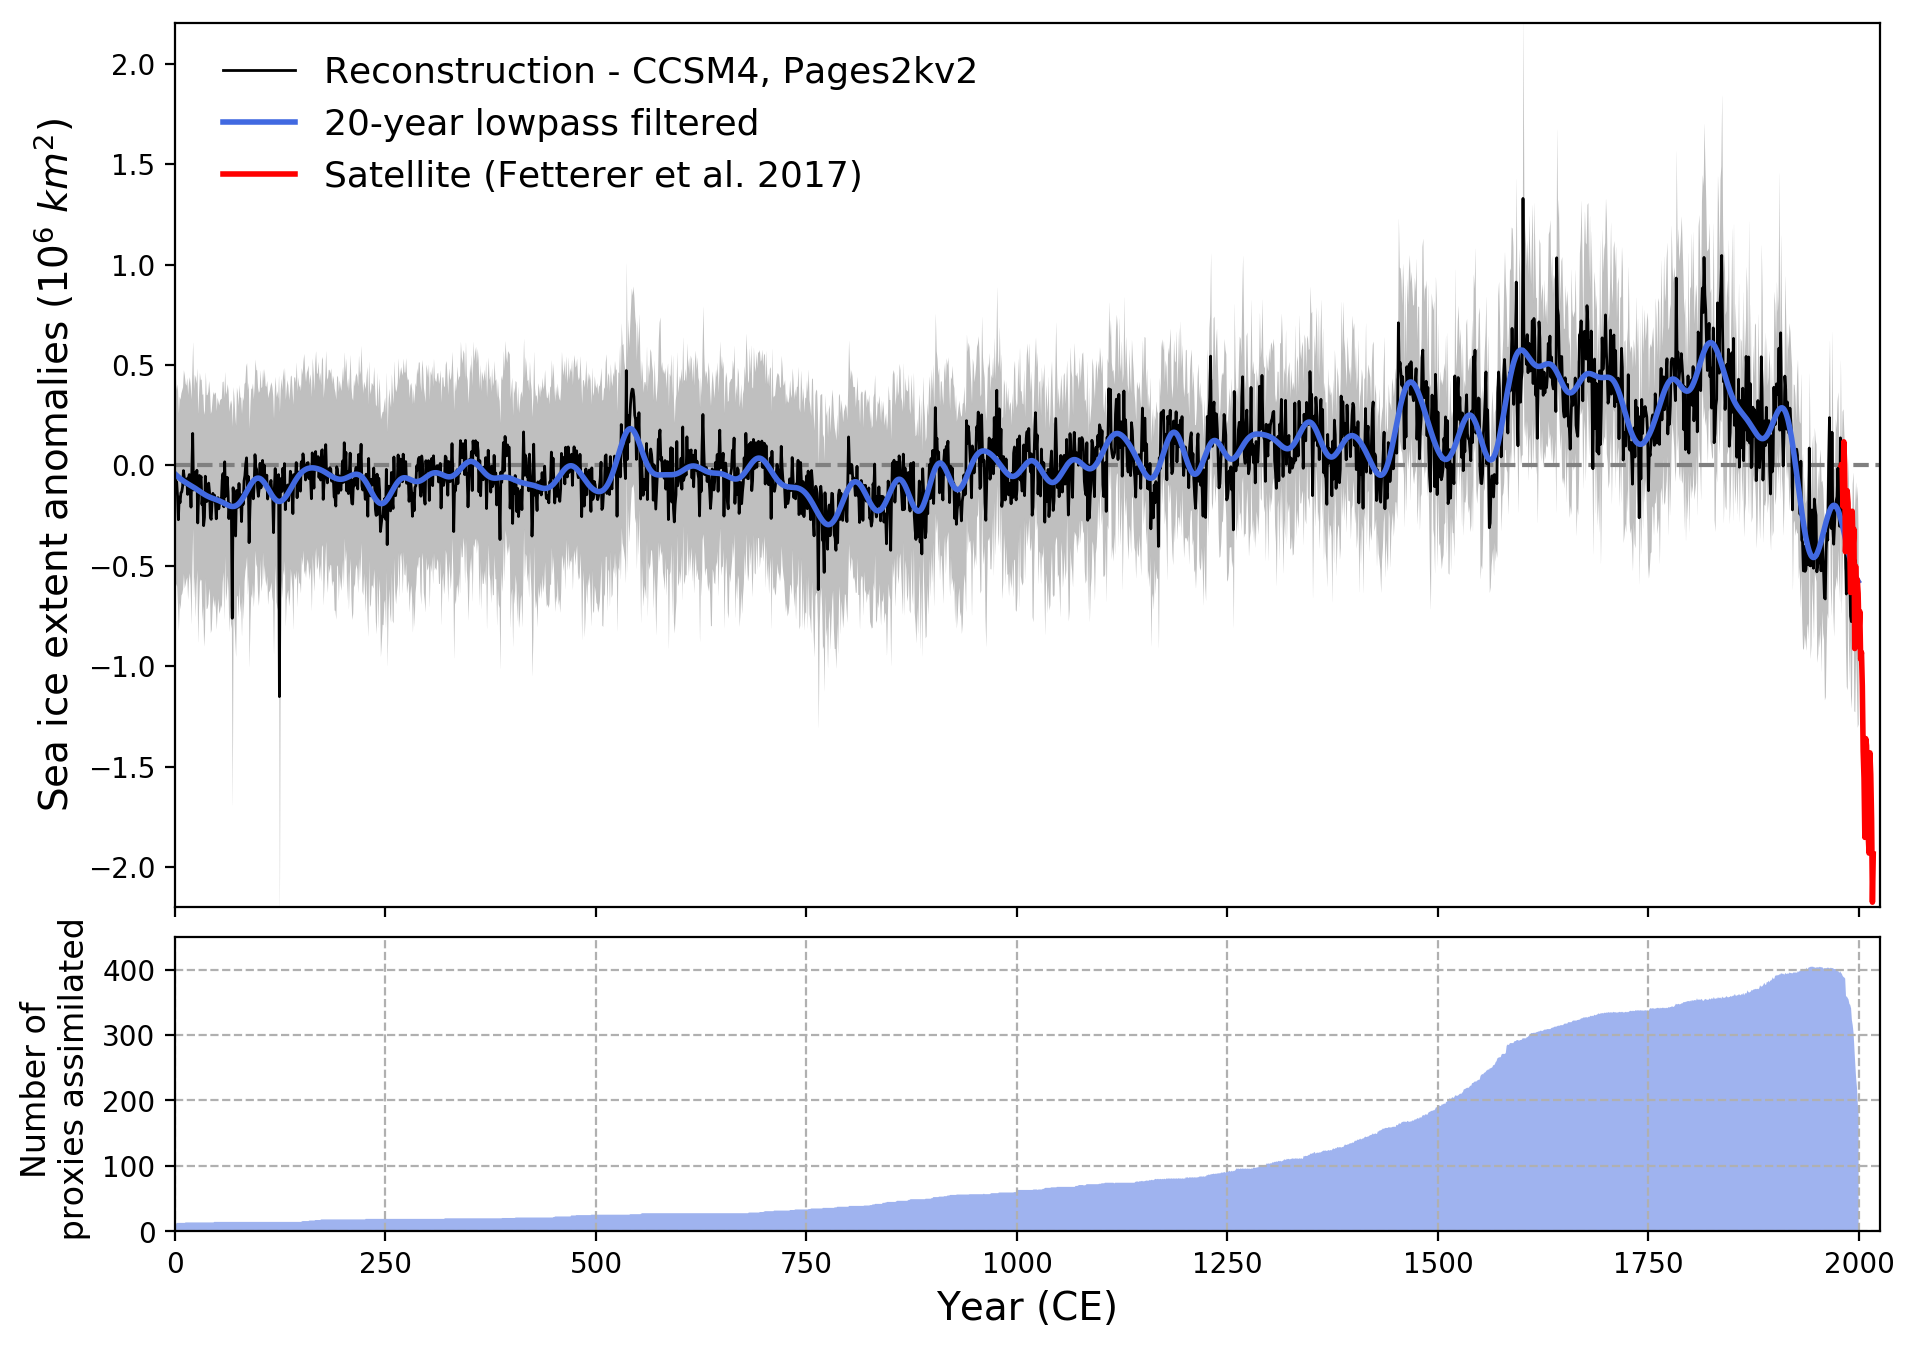

In [33]:
fig, (ax_recon,ax_prox) = plt.subplots(2, figsize=(11,8),sharex=True,
                                       gridspec_kw={"height_ratios": (.75,.25)})

ax_recon.axhline(0,linestyle='--',color='grey')

# plt.fill_between(recon_years,sie_2_5_allit_mpi,sie_97_5_allit_mpi,alpha=0.15, color='purple')
ax_recon.fill_between(recon_years,sie_2_5_allit_ccsm4,sie_97_5_allit_ccsm4,color='gray',lw=0.01,alpha=0.5)
# ax_recon.fill_between(bren2020_time,sie_CCSM4_HadCRUT4_2_5_anom,
#                  sie_CCSM4_HadCRUT4_97_5_anom,color='k',alpha=0.15)

ax_recon.plot(recon_years,sie_ensmn_anom_allit_ccsm4,color='k',#'#107ab0',
         label='Reconstruction - CCSM4, Pages2kv2',linewidth=1)
ax_recon.plot(recon_years,sie_ccsm4_filt20,color='royalblue',#'#107ab0',
         label='20-year lowpass filtered',linewidth=2)
# ax_recon.plot(bren2020_time,sie_bren2020['sie_CCSM4_HadCRUT4_anom'],
#          label='Reconstruction - CCSM4, HadCRUT4 (Brennan et al. 2020)', color='k',linewidth=1.5)
# ax_recon.plot(walsh_time,walsh_sie_anom,
#          label='Reconstruction - Walsh et al 2017', color='#836539',linewidth=2)
ax_recon.plot(fet_time,fet_sie_anom,label='Satellite (Fetterer et al. 2017)', color='r',linewidth=2)

ax_recon.set_ylabel('Sea ice extent anomalies (10$^{6}$ $km^2$)',fontsize=14)
#ax_recon.set_xlabel('Year (CE)',fontsize=14)

ax_recon.legend(fontsize=13,bbox_to_anchor=(0.49, 1),frameon=False)
#plt.ylim(7,13.1,1)
ce_corr_plt_ccsm4 = (('(Brennan et al. 2020, DA proxy recon): R$^{2}$ = ' + '{:,.2f}'.format(corr_sie_ccsm4**2))+
               ', CE = '+'{:,.2f}'.format(ce_sie_ccsm4))
# ce_corr_plt_mpi = (('(Brennan et al. 2020, DA recon): R$^{2}$ = ' + '{:,.2f}'.format(corr_sie_mpi**2))+
#                ', CE = '+'{:,.2f}'.format(ce_sie_mpi))

#plt.gcf().text(0.14, 0.14, ce_corr_plt_ccsm4 , fontsize=13,color='k')

ax_recon.set_xlim(0,2025)
ax_recon.set_ylim(-2.2,2.2)

ax_prox.fill_between(recon_years,0,np.nanmean(nobs_allit_ccsm4,axis=1), linewidth=0.01,
                     color='royalblue',alpha=0.5)
ax_prox.set_xlabel('Year (CE)', fontsize=14)
ax_prox.set_ylabel('Number of \n proxies assimilated', fontsize=12)
ax_prox.grid(linestyle='--')

ax_prox.set_xlim(0,2025)
ax_prox.set_ylim(0,450)

plt.subplots_adjust(wspace=0, hspace=0.05)

(1840, 2000)

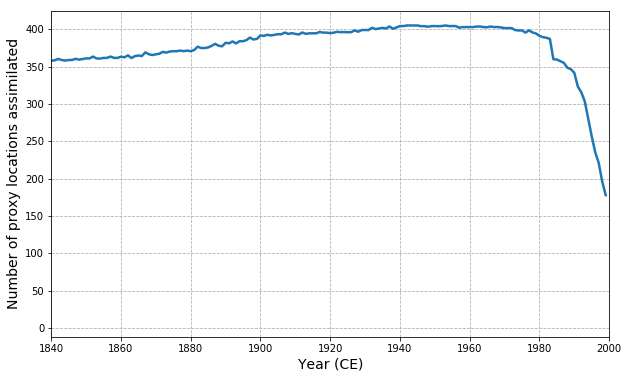

In [81]:
plt.figure(figsize=(10,6))
plt.plot(np.nanmean(nobs_allit_ccsm4,axis=1), linewidth=2.5)
#plt.plot(nobs_allit_mpi)

plt.xlabel('Year (CE)', fontsize=14)
plt.ylabel('Number of proxy locations assimilated', fontsize=14)
#plt.legend()
plt.grid(linestyle='--')

plt.xlim(1840,2000)

### Plotting Proxy Locations Assimilated: 

In [147]:
prox_info = {'Tree Rings_WidthPages2':{'color':'g','label':'Tree Rings_WidthPages2'},
             'Tree Rings_WidthBreit':{'color':'lawngreen','label':'Tree Rings_WidthBreit'}, 
             'Tree Rings_WoodDensity':{'color':'mediumseagreen','label':'Tree Rings_WoodDensity'}, 
             'Tree Rings_Isotopes':{'color':'yellowgreen','label':'Tree Rings_Isotopes'}, 
             'Corals and Sclerosponges_d18O':{'color':'salmon','label':'Corals and Sclerosponges_d18O'},
             'Corals and Sclerosponges_SrCa':{'color':'orangered','label':'Corals and Sclerosponges_SrCa'}, 
             'Corals and Sclerosponges_Rates':{'color':'red','label':'Corals and Sclerosponges_Rates'}, 
             'Ice Cores_d18O':{'color':'lightskyblue','label':'Ice Cores_d18O'}, 
             'Ice Cores_dD':{'color':'aqua','label':'Ice Cores_dD'}, 
             'Ice Cores_Accumulation':{'color':'dodgerblue','label':'Ice Cores_Accumulation'}, 
             'Lake Cores_Varve':{'color':'brown','label':'Lake Cores_Varve'}, 
             'Lake Cores_Misc':{'color':'goldenrod','label':'Lake Cores_Misc'}, 
             'Bivalve_d18O':{'color':'darkorchid','label':'Bivalve_d18O'}}

In [148]:
output_file_c

'sic_ccsm4_anrecon_1979_2000_pages2kv2_inf2_6_loc15000_iter0.pkl'

/home/disk/chaos/mkb22/anaconda2/envs/lmr_py3_xarray/lib/python3.6/site-packages/cartopy/util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


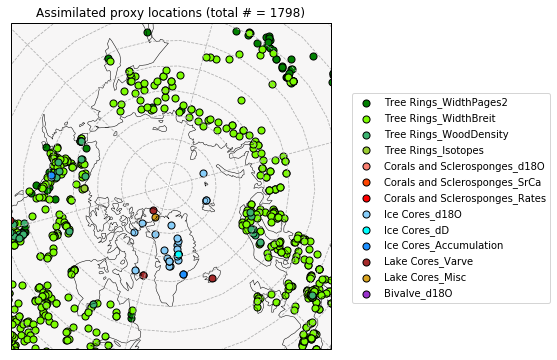

In [149]:
# Plot assimilated proxies: Arctic 
nexp = proxy_assim_loc_allit_d['iter 0']
grid = load_recon_grid()

prox_present = nexp.keys()
nprox=0
for loc in prox_present: 
    nprox = nprox + nexp[loc]['lat'].shape[0]

handle_list = []
label_list = []

fig,ax = plt.subplots(1,1, figsize=(6, 6), subplot_kw = proj)
sub_arctic_plot(fig,ax,np.zeros((grid.nlat,grid.nlon)),
                grid.lat[:,0],grid.lon[0,:],
                'Assimilated proxy locations (total # = '+str(nprox)+')',
                1, colorbar=False)
for loc in prox_present: 
    ax.scatter([nexp[loc]['lon']],[nexp[loc]['lat']],
               color=prox_info[loc]['color'],transform=ccrs.PlateCarree(), 
               label=prox_info[loc]['label'], edgecolors='k',s=50)

handles, labels = ax.get_legend_handles_labels()
for handle, label in zip(handles, labels):
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)
ax.legend(handle_list, label_list,bbox_to_anchor=(1.05, 0.8))

#fig.suptitle('SIC Truth vs Reconstruction: 1681-1850', fontsize=14)
#plt.tight_layout(rect=(0,0,1,0.93))

# savedir = '/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/analysis/figures/sic_ccsm4_anrecon_0_2000_fullLMRdbv1_1_inf2_6_loc15000_a/'
# savename = 'assim_proxies_arc_2090.png'
# plt.savefig(savedir+savename)

/home/disk/chaos/mkb22/anaconda2/envs/lmr_py3_xarray/lib/python3.6/site-packages/cartopy/util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


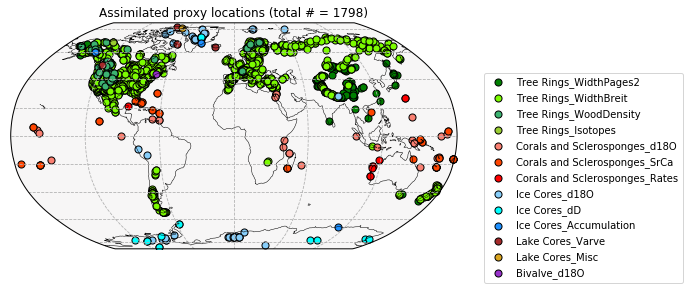

In [150]:
# Plot assimilated proxies: Global 
nexp = proxy_assim_loc_allit_d['iter 0']
grid = load_recon_grid()

handle_list = []
label_list = []

prox_present = nexp.keys()
nprox=0
for loc in prox_present: 
    nprox = nprox + nexp[loc]['lat'].shape[0]

fig,ax = plt.subplots(1,1, figsize=(8,6), subplot_kw = dict(projection=ccrs.Robinson()))
sub_arctic_plot(fig,ax,np.zeros((grid.nlat,grid.nlon)),
                grid.lat[:,0],grid.lon[0,:],
                'Assimilated proxy locations (total # = '+str(nprox)+')',1, 
                colorbar=False, extent=False)
for loc in prox_present: 
    ax.scatter([nexp[loc]['lon']],[nexp[loc]['lat']],
               color=prox_info[loc]['color'],transform=ccrs.PlateCarree(), 
               label=prox_info[loc]['label'], edgecolors='k',s=50)

handles, labels = ax.get_legend_handles_labels()
for handle, label in zip(handles, labels):
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)
ax.legend(handle_list, label_list,bbox_to_anchor=(1.05, 0.8))

# savedir = '/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/analysis/figures/sic_ccsm4_anrecon_0_2000_fullLMRdbv1_1_inf2_6_loc15000_a/'
# savename = 'assim_proxies_global_2090.png'
# plt.savefig(savedir+savename)